## Truncated power law 

The general expression for state visits is 
$$
p(i) = \sum\limits_{j=1}^{N} T(i \mid j) \pi_j 
$$

So the distrubution of the vists depedns solely on the priors $\mathbf{\pi}$ and the triangular transitions $\mathbf{T}$ 

In [4]:
import numpy as np 
import matplotlib.pyplot as plt 
from collections import Counter 
import powerlaw 
from tqdm import tqdm 
import powerlaw 

## Python Implementation 
Here there is a simpler implementation that the one I did using `C++`

In [25]:
def std_ssr(n):
    value = n
    while value != 1:
        next_state = np.random.choice(np.arange(1, value))
        yield int(next_state)
        value = next_state

def noisy_ssr(n, lam):
    current_state = n
    while current_state > 1:
        u = np.random.rand()
        if u < lam:
            next_state = np.random.randint(1, current_state)
        else:
            next_state = np.random.randint(1, n)
        yield next_state
        current_state = next_state
def cascade_ssr(n, mu):
    balls = [n]
    base_balls = 1
    decimal_part = mu - base_balls
    
    while balls:
        new_balls = []
        for current_state in balls:
            if current_state != n:
                yield current_state
            if current_state > 1:
                num_new_balls = base_balls
                if np.random.rand() < decimal_part:
                    num_new_balls += 1
                for _ in range(num_new_balls):
                    next_state = np.random.randint(1, current_state)
                    yield next_state  
                    new_balls.append(next_state)
        balls = new_balls

In [30]:
n = 1001 
m = 10_000
all_arr = []
for _ in range(m):
    result = list(std_ssr(n))
    all_arr.extend(result)

In [33]:
count = Counter(all_arr)
values = [v for _, v in count.most_common()]
rank = [k for k, _ in count.most_common()]

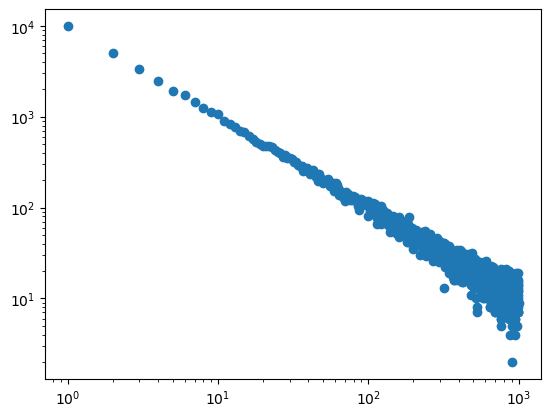

In [36]:
plt.scatter(rank, values)
plt.xscale("log")
plt.yscale("log")


In [ ]:
def gap_ssr(n, alpha=1.0):
    value = n
    while value != 1:
        candidates = np.arange(1, value)

        gaps = value - candidates

        weights = gaps.astype(float)**alpha

        probs = weights / weights.sum()

        next_state = np.random.choice(candidates, p=probs)

        yield int(next_state)
        value = next_state


In [ ]:
n = 10001
m = 1000_000

alphas = [0, 1, 2, 3]

results_dict = {}  

for alpha in alphas:
    all_arr = []
    for _ in range(m):
        result = list(gap_ssr(n, alpha))
        all_arr.extend(result)
    results_dict[alpha] = np.array(all_arr)

print(results_dict[2][:10])

[4860 1130  162   44   15    2    1 5137  368   17]


In [ ]:
for alpha in alphas:
    all_arr = results_dict[alpha]
    fit = powerlaw.Fit(all_arr, xmin=1)  
    print(f"Results for alpha = {alpha}:")
    print(f"  Estimated power-law exponent: {fit.alpha}")
    print(f"  xmin: {fit.xmin}")
    print(f"  KS distance: {fit.D}\n")

KeyboardInterrupt: 

In [107]:
R, p = fit.distribution_compare('truncated_power_law', 'power_law')

print(f"Best fit alpha (truncated): {fit.truncated_power_law.alpha}")
# print(f"Truncation parameter: {fit.truncated_power_law.lambda_}")
print(f"KS for truncated power law: {fit.truncated_power_law.D}")
print(f"Likelihood ratio vs pure power law: {R}, p-value: {p}")

Best fit alpha (truncated): 1.0000650076444717
KS for truncated power law: 0.05069597069597065
Likelihood ratio vs pure power law: 0.07742426877679565, p-value: 0.6939443244454591


Assuming nested distributions


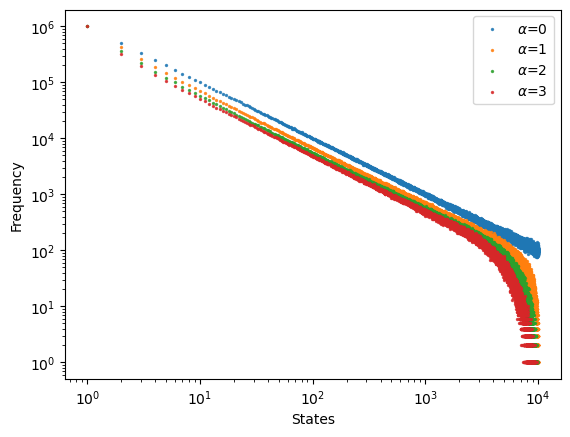

In [ ]:
plt.figure()
for alpha in alphas:
    all_arr = results_dict[alpha]
    
    count = Counter(all_arr)
    values = [v for _, v in count.most_common()]
    rank = [k for k, _ in count.most_common()]
    plt.scatter(rank, values, s=2, alpha = 0.8, label=rf"$\alpha$={alpha}")
    plt.xscale("log")
    plt.yscale("log")
    plt.legend()
plt.xlabel("States")
plt.ylabel("Frequency")
plt.savefig("./cpp/results/truncated_powerlaw.png")
plt.show()

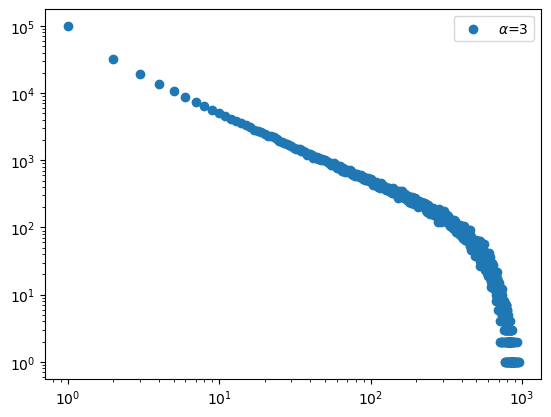

In [109]:
plt.scatter(rank, values, label=rf"$\alpha$={alpha}")
plt.xscale("log")
plt.yscale("log")
plt.legend()

In [ ]:
def softmax_ssr(n, beta=1.0):
    value = n
    while value != 1:
        candidates = np.arange(1, value)

        logits = -beta * candidates
        logits -= np.max(logits)
        probs = np.exp(logits) / np.exp(logits).sum()

        # Choose next state based on softmax
        next_state = np.random.choice(candidates, p=probs)

        yield int(next_state)
        value = next_state

In [ ]:
n = 10_001
m = 1000_000

betas = [0.0, 0.01, 0.1, 1.0]  
results_dict = {}  

for beta in betas:
    all_arr = []
    for _ in range(m):
        result = list(softmax_ssr(n, beta))
        all_arr.extend(result)
    results_dict[beta] = np.array(all_arr)

arr_beta0 = results_dict[0.0]
print(arr_beta0[:10])


[7991  830  118   70   25    6    1 7612 2840 2654]


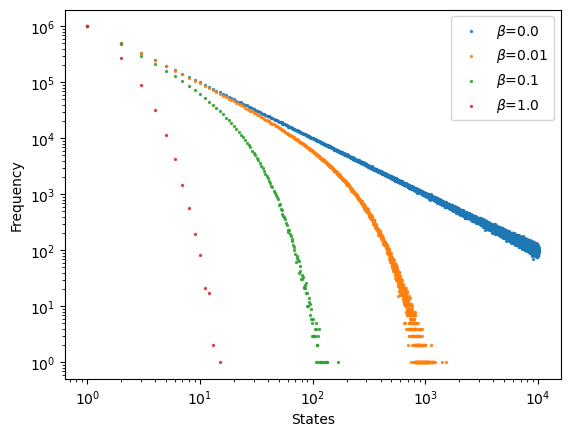

In [ ]:
plt.figure()
for beta in betas:
    all_arr = results_dict[beta]  
    
    count = Counter(all_arr)
    values = [v for _, v in count.most_common()]
    rank = [k for k, _ in count.most_common()]
    
    plt.scatter(rank, values, s=2, alpha=0.8, label=rf"$\beta$={beta}")
    
plt.xlabel("States")
plt.ylabel("Frequency")
plt.legend()
plt.xscale("log")  
plt.yscale("log")
plt.savefig("./cpp/results/exp_ssr.png")
plt.show()